# ANACIN-X 

## Kernel Distance Time Series (KDTS) vs Non-Determinism Visualizer

### This notebook can be used to save and view the output of an ANACIN-X workflow execution. 



This document will be used to visualize kernel distance (KDTS) data and Call-stack data produced by the ANACIN-X project at [this GitHub repository](https://github.com/TauferLab/ANACIN-X/tree/master).  Please refer to [research of the authors](https://ieeexplore.ieee.org/abstract/document/9435018) and [the ANACIN-X README.md](https://github.com/TauferLab/ANACIN-X/blob/master/README.md) for more information about using the project.

Throughout this process you may either use files within the output of a run you've made yourself, or you may use provided sample inputs within ANACIN-X.

We will walk you through inputting what’s needed for visualization, and at the end you will have access to .png images that display: (1) the relationship between event graph kernel distance and the percentage of non-determinism in a given communication pattern and (2) the callstack functions with high percentage of non-determinism.

We will start by guiding you through visualizing KDTS data by helping you find the inputs required.

Below you will find inputs for 3 system paths and 2 parameter settings.  We will describe each in more detail as you need them.

1. The root to your ANACIN-X directory
2. KDTS file w/ path
3. JSON kernel configuration file w/ path
4. Comm pattern name
5. Percentages of non-determinism used in the communication pattern

First, run the following code block and use the selection tool below to target the path to the root of your project.  

1. Click ‘Select’ to activate the tool.
2. Your project root should be the path to the same directory that you ran your project from.  It may appear by default since it is the same directory this Jupyter file can be found in.
3. Target the directory by clicking it.  Once the directory is targeted, click ‘Select’.

In [1]:
from ipyfilechooser import FileChooser
import ipywidgets as widgets
from IPython.display import Image
import os

fc = FileChooser()
display(fc)

FileChooser(path='/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X', filename='', title='HTML(value='', layout=L…

Second, run the following code block and use the selection tool below to target the path to the KDTS file you wish to visualize.

If you wish to use provided sample data, select any file within the ANACIN-X project subdirectory 'sample_kdts'.

If you wish to use your own generated kdts file, find it via the following steps:
1. Click ‘Select’ to activate the tool.
2. Navigate to the output of your executions.  
3. From there, follow the directory tree down according to the inputs you made when executing the project until you find a file title ‘kdts.pkl’.
4. Target the file by clicking it.  Once the file is targeted, click ‘Select’.

In [2]:
gfc = FileChooser()
display(gfc)

FileChooser(path='/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X', filename='', title='HTML(value='', layout=L…

Third, run the following code block and use the selection tool below to target the path to the JSON configuration file which defines the graph kernel settings used when generating your KDTS file.

If you are using provided sample data, find your JSON file within the ANACIN-X project under the path and name: 

anacin-x/event_graph_analysis/graph_kernel_policies/wlst_5iters_logical_timestamp_label.json

If you are using your own generated kdts data, locate your JSON file via the following steps:
1. Click ‘Select’ to activate the tool.  
2. Navigate once more to the output of your executions.
3. Within the root of your output, find the file with the .json file type.
4. Target the file by clicking it.  One the file is targeted, click ‘Select’.

In [3]:
kernel_fc = FileChooser()
display(kernel_fc)

FileChooser(path='/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X', filename='', title='HTML(value='', layout=L…

You now need to choose which communication pattern was used for your run.  You can choose between 1 of the following 3 options:

* message_race
* amg2013
* unstructured_mesh
* mcb_grid

If you are using provided sample data, locate your pattern name within the kdts file name of the form "samp_<pattern_name>_kdts_*>.

For a reference of which communication pattern was used when generating your own results, locate the run configuration file within your output directory and find the pattern on the first line.

In [4]:
# Generate and display comm pattern selection
comm_pattern = widgets.RadioButtons(    
    options=['message_race', 'amg2013', 'unstructured_mesh','mcb_grid'],
    layout={'width': 'max-content'}, # If the items' names are long
    style = {'description_width':'initial'},
    description='Communication Pattern:',
    disabled=False
)
display(comm_pattern)

RadioButtons(description='Communication Pattern:', layout=Layout(width='max-content'), options=('message_race'…

You need to choose the percentages of non-determinism used during your benchmark simulation by adjusting the sliders below.

There are two types of non-determinism settings to select: message non-determinism and topological non-determinism. The topological non-determinism is only relevant if your communication pattern is unstructured mesh.

For all benchmarks, you must select three values to define your message non-determinism settings: the starting percentage, the percentage step size, and the ending percentage.  These must satisfy the condition:

starting percentage + (step size * number of percentages used) = ending percentage

If you are using provided sample kdts data, you may leave the non-determinism percentage sliders below at their default values (0.0, 0.1, and 1.0)

For a reference of which values were used on your own generated data, either find it in the path chosen for your KDTS file above or locate the run configuration file within your output directory and find the inputs under the line items: Starting Non-determinism Percentage, Non-determinism Percentage Step Size, and Ending Non-determinism Percentage.

If you ran the Unstructured Mesh communication pattern, you will also need to select a percentage of topological non-determinism from the menu below.  You can determine which percentage is correct from the path chosen for your KDTS file above or from the run configuration file under the line item 'Topological Non-determinism Percentage'.

If you did not run the Unstructured Mesh communication pattern, you can ignore the 'Topological Non-determinism Percent' selection.

In [5]:
# Generate and display starting non-determinism percentage selection in decimal format
nd_start = widgets.FloatSlider(
    value=0.00,
    min=0.00,
    max=1.00,
    step=0.01,
    #layout={'width': 'max-content'},
    #style = {'description_width':'initial'},
    description='Start ND%:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(nd_start)

# Generate and display starting non-determinism percentage selection in decimal format
nd_iter = widgets.FloatSlider(
    value=0.10,
    min=0.00,
    max=1.00,
    step=0.01,
    #style = {'description_width':'initial'},
    description='ND% Step Size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(nd_iter)

# Generate and display starting non-determinism percentage selection in decimal format
nd_end = widgets.FloatSlider(
    value=1.00,
    min=0.00,
    max=1.00,
    step=0.01,
    #style = {'description_width':'initial'},
    description='Ending ND%:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(nd_end)

# Generate and display non-determinism percent selection
#if (comm_pattern.value == "unstructured_mesh"):
unmesh_topo = widgets.FloatSlider(
    value=0.50,
    min=0.00,
    max=1.00,
    step=0.01,
    #style = {'description_width':'initial'},
    description='Topological ND%:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
display(unmesh_topo)

FloatSlider(value=0.0, continuous_update=False, description='Start ND%:', max=1.0, step=0.01)

FloatSlider(value=0.1, continuous_update=False, description='ND% Step Size:', max=1.0, step=0.01)

FloatSlider(value=1.0, continuous_update=False, description='Ending ND%:', max=1.0, step=0.01)

FloatSlider(value=0.5, continuous_update=False, description='Topological ND%:', max=1.0, step=0.01)

The last step of setup is getting the output file specified -- this process creates a .png file. 

The output path defaults to the ANACIN-X root, and needs to be in the following format:

/path/to/filename

The name of the file does *not* need a .png appended. Leave that out, it will be added automatically. Thus, a possible output path could be:

/home/user98/ANACIN-X/my_msg_race

Which will generate my_msg_race.png in the ANACIN-X folder. 

In [6]:
outpath = widgets.Text(
    value=fc.selected + "file_name",
    placeholder='/foo/bar',
    style = {'description_width':'initial'},
    description='Output file path:',
    layout={'width': '500px'},
    disabled=False
)

display(outpath)

Text(value='/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X/file_name', description='Output file path:', layout…

Before generating the visualization, we calculate Pearsons r and Spearmans rho correlation values.

Pearsons r value is a measure between 0 and 1 of linear correlation between two sets of data that falls.  In our case, Pearsons r measures the linear correlation between the percentage of non-determinism in a communication pattern and the kernel distance in that pattern’s event graph.  For us, a high value (a value close to 1) is good.

Spearmans rho value is a measure between 0 and 1 of how well the relationship between two variables can be represented with a monotonic function.  In our case, Spearmans rho measures this between the percentage of non-determinism in a communication pattern and the kernel distance in that pattern’s event graph.  For us, a high value (a value close to 1) is good.

We also print the corresponding p value for both Pearsons r and Spearmans rho.  The p value describes the likelihood that the variables being studied, in this case percentage of non-determinism in a communication pattern and the kernel distance in that pattern’s event graph, don't have an effect on each other.  As such, a low p value (a value close to 0) means that the two variables are likely to affect each other.

In summary, good results will have a high Pearsons r value, a high Spearmans rho value, and a low p value.

For more information about Pearsons r, Spearmans rho, and p values, see the following links:
* [Pearsons r](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) 
* [Spearmans rho](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
* [p value](https://en.wikipedia.org/wiki/P-value)

Run the following cell to retrieve your r, rho, and p values and to visualize the ANACIN-X output. It will save the specified image file, and display it within this notebook.

Your Pearson's r value     = 0.95

It's corresponding p value = 2.7515726180167255e-55



Your Spearman's ρ value    = 0.99

It's corresponding p value = 1.7136867923534901e-109



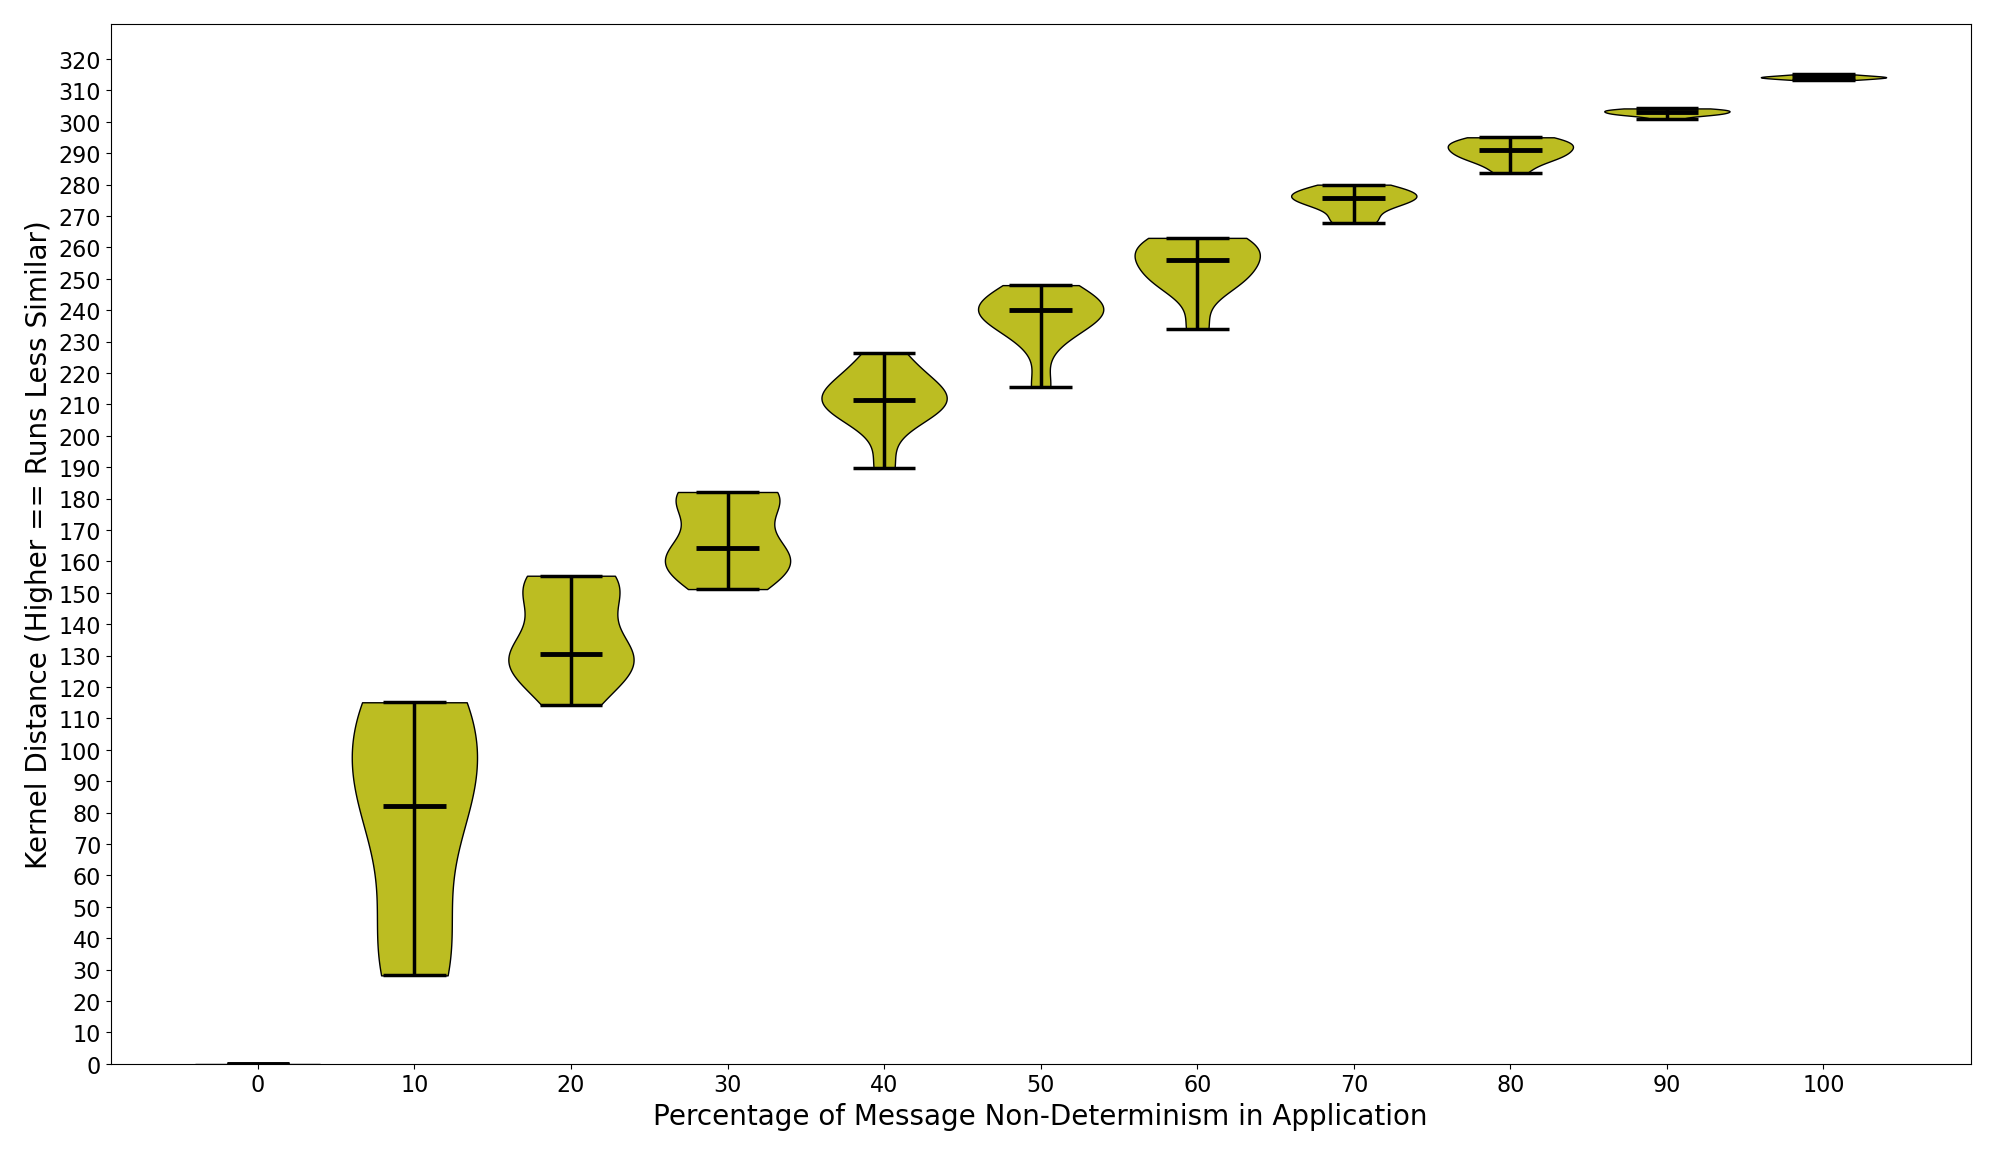

In [7]:
if gfc.selected == "unstructured_mesh":
    !python3 $fc.selected/anacin-x/event_graph_analysis/visualization/make_message_nd_plot.py $gfc.selected $comm_pattern.value $kernel_fc.selected $outpath.value --nd_neighbor_fraction $unmesh_topo.value
else:
    !python3 $fc.selected/anacin-x/event_graph_analysis/visualization/make_message_nd_plot.py $gfc.selected $comm_pattern.value $kernel_fc.selected $outpath.value $nd_start.value $nd_iter.value $nd_end.value
    
Image(filename=outpath.value+".png") 

If there were no errors, you will find your KDTS visualization png file within the location you selected above.

<!-- Next, we will help you identify the additional input required to generate a visualization of call-stack data.

You will need to select a policy for detecting anomalies.  -->



Last, if you wish to produce a visualization for callstack data. It will display the callstack functions with the highest kernel distances.  This corresponds to the callstack functions with the highest percentages of non-determinism.

**Note** Callstack visualization will not work on provided sample data from ANACIN-X.  You will need to generate your own data to use callstack visualization.

In [11]:
# Select an anomaly detection policy.
ad_path = fc.selected + "/anacin-x/event_graph_analysis/anomaly_detection_policies/all.json"

# Determine a path for storing flagged slices.
fs_file = gfc.selected_path + "/flagged_indices.pkl"

# Executable for project
ex_file = fc.selected + "apps/comm_pattern_analysis/build/comm_pattern_generator"

callstack_report = gfc.selected_path + "/non_anomaly_report_for_policy_" + os.path.splitext(os.path.split(ad_path)[1])[0] + ".txt"

# Process callstack data
!python3 $fc.selected/anacin-x/event_graph_analysis/anomaly_detection.py $gfc.selected ad_path -o os.path.split(ad_path)[1]

!python3 $fc.selected/anacin-x/event_graph_analysis/callstack_analysis.py $fs_file $gfc.selected ex_file

!python3 $fc.selected/anacin-x/event_graph_analysis/visualization/visualize_callstack_report.py $callstack_report --plot_type="bar_chart"

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `python3 /Users/nickbell/Documents/UTK/ANACINX/ANACIN-X//anacin-x/event_graph_analysis/anomaly_detection.py /Users/nickbell/Documents/UTK/ANACINX/ANACIN-X/test_csmpi_visual_kdts.pkl ad_path -o os.path.split(ad_path)[1]'
Traceback (most recent call last):
  File "/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X//anacin-x/event_graph_analysis/callstack_analysis.py", line 12, in <module>
    from elftools.common.py3compat import maxint, bytes2str
ModuleNotFoundError: No module named 'elftools'
Traceback (most recent call last):
  File "/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X//anacin-x/event_graph_analysis/visualization/visualize_callstack_report.py", line 186, in <module>
    main( args.report_path, args.plot_type, args.y_axis, args.global_callstack_distribution )
  File "/Users/nickbell/Documents/UTK/ANACINX/ANACIN-X//anacin-x/event_graph_analysis/visualization/visualize_callstack_report.py", line 1

If there were no errors, you will find your callstack visualization file in the root directory of your project.

Thank you for using the ANACIN-X project.